In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score, PrecisionRecallDisplay,  average_precision_score, precision_recall_curve, auc, plot_precision_recall_curve

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# What's the baseline accuracy?
df.Class.value_counts(normalize = True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

Since the dataset is 99.83% class 0, the baseline accuracy is 0.9983 (in effect if the models predict all of the observations to be of class 0 then it will get an accuracy score 0f 0.9983.)

Furthermore, it means that we have heavily (or extremely) imbalanced class data, since less than 1% of the data is positive.

We can handle this in a few ways, firstly by changing the metrics we use to score the model and then secondly by changing the sample.

In [6]:
df.groupby('Class')['Amount'].mean()

Class
0     88.291022
1    122.211321
Name: Amount, dtype: float64

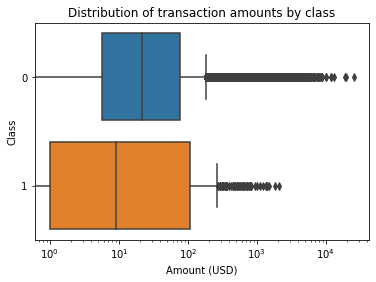

In [7]:
ax = sns.boxplot(data=df, x = 'Amount', y = 'Class', orient="h")
ax.set(title = "Distribution of transaction amounts by class", xlabel = "Amount (USD)", ylabel = 'Class')
ax.set_xscale("log");

In [8]:
df.groupby('Class')['Amount'].min()

Class
0    0.0
1    0.0
Name: Amount, dtype: float64

In [9]:
df.groupby('Class')['Amount'].max()

Class
0    25691.16
1     2125.87
Name: Amount, dtype: float64

In [10]:
df.groupby('Class')['Amount'].median()

Class
0    22.00
1     9.25
Name: Amount, dtype: float64

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
X = df.iloc[:,0:30]
y = df.iloc[:,-1]

In [13]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(227845, 30) (227845,)
(56962, 30) (56962,)


In [16]:
scaler = StandardScaler()

X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_test['Amount'] = scaler.transform(X_test[['Amount']])

X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
148894,90296.0,-0.614670,0.667191,-0.807046,-1.345089,2.093272,-0.244268,1.040037,-0.189512,1.105336,...,-0.351196,-0.345495,-0.690278,0.443984,-0.508205,-1.084442,-0.252261,-0.100874,0.311842,-0.311627
149331,91034.0,-0.251163,1.223851,-0.006040,-0.651568,1.486648,-0.721204,1.490755,-0.340784,0.022848,...,-0.136138,0.071237,0.409649,-0.337094,0.764062,0.140977,0.294995,0.009465,0.119201,-0.326050
164755,116966.0,1.621797,-0.677173,-1.943449,0.443123,-0.018469,-0.718087,0.223660,-0.124213,0.893354,...,0.188849,-0.109453,-0.571174,-0.039053,-0.533907,-0.142520,-0.102380,-0.053695,-0.002554,0.466386
80320,58432.0,1.208963,-0.164911,-0.762305,0.012764,0.642106,0.566327,0.077243,0.144293,-0.027635,...,-0.035352,-0.077214,-0.384561,-0.286030,-1.701549,0.598367,0.625142,-0.072340,-0.019914,-0.096222
28430,35006.0,-1.434929,-1.587870,1.039760,-1.212899,0.872839,-2.155917,-0.081731,-0.229774,-0.871903,...,0.134804,-0.271771,-0.751199,0.438227,0.332335,-0.420248,0.784341,0.033105,0.006413,-0.004956


In [62]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, y_train)
print("accuracy score on train data :", lr.score(X_train, y_train))
print("cross val scores on train data :", cross_val_score(lr, X_train, y_train, cv = 5))
print("mean cross val score :", cross_val_score(lr, X_train, y_train, cv = 5).mean())
print("accuracy score on test data :", lr.score(X_test, y_test))

accuracy score on train data : 0.9992187671443306
cross val scores on train data : [0.99923193 0.99920999 0.99925388 0.99914416 0.99907832]
mean cross val score : 0.9991836555553117
accuracy score on test data : 0.9992802219023208


In [63]:
lr_pred = lr.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.66      0.76        98

    accuracy                           1.00     56962
   macro avg       0.94      0.83      0.88     56962
weighted avg       1.00      1.00      1.00     56962



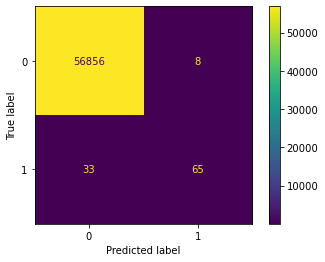

In [66]:
print(classification_report(y_test, lr_pred))
disp = ConfusionMatrixDisplay.from_estimator(lr, X_test,y_test)
plt.show();

In [20]:
baseline = 0.9983
lr.score(X_test, y_test) - baseline

0.0009802219023208325

While the accuracy scores are high, the baseline score is very high and the model only improves on the baseline by less than 0.001.
The model also incorrectly labels 33 fraudulent transactions as non - fraudulent, which is why the recall score for class 1 is at 0.66 (that is to say it only correctly identifies 66% of the fraudulent transactions).  The lower precision score for class 1 compared to class 0 is  because of the 73 predictions for label 1, 8 are incorrect.  
Better metrics to focus on would be the precision, recall and f1 scores for class 1 as this would indicate the ability to correctly predict fraudulent transfers.  
Also, including some sort of metric on time would be useful since slower models would have a negative effect on the speed of all other transfers.
What about other classifiers

Confusion matrix for LogisticRegression(max_iter=1000)


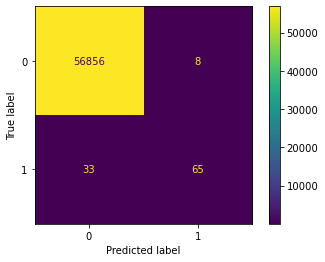

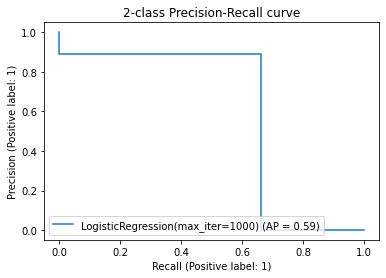

Confusion matrix for DecisionTreeClassifier()


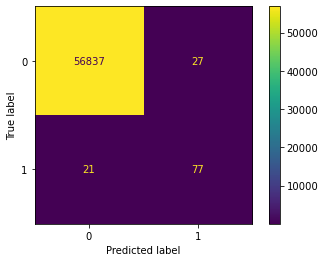

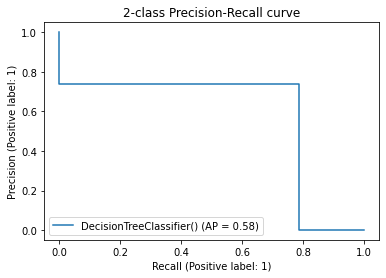

Confusion matrix for RandomForestClassifier()


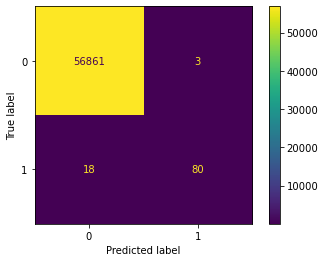

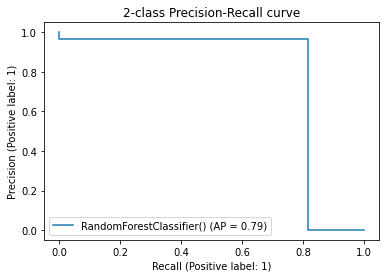

Confusion matrix for AdaBoostClassifier()


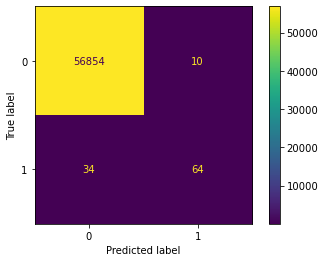

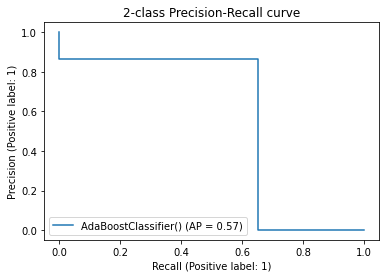

Confusion matrix for ExtraTreesClassifier()


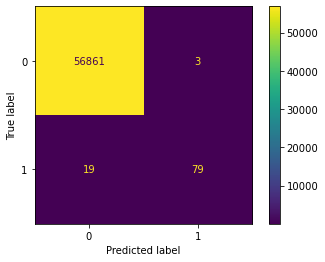

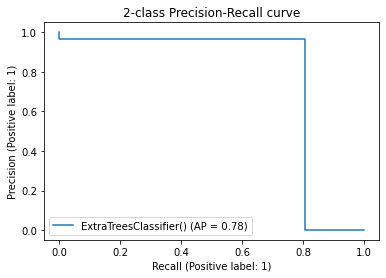

/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Confusion matrix for KNeighborsClassifier()


/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


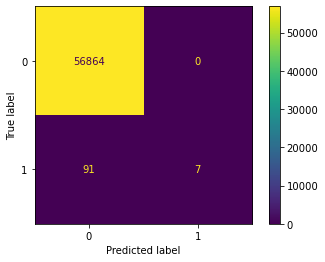

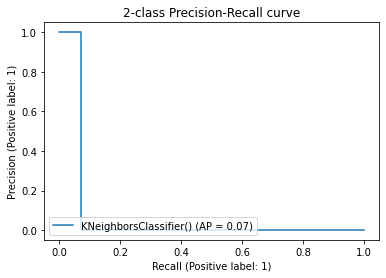

In [127]:
classifiers = [('LogReg' ,LogisticRegression(max_iter = 1000)), 
          ('Tree', DecisionTreeClassifier()), 
          ('Forest', RandomForestClassifier()), 
          ('Ada', AdaBoostClassifier()),
          ('ExtraTrees', ExtraTreesClassifier()), 
          ('KNN', KNeighborsClassifier())]
models = []
precision_scores = []
recall_scores = []
f1_scores = []
train_times = []
predict_times = []
auc = []
for name, model in classifiers:
    train_start = time.time()
    model.fit(X_train, y_train)
    train_end = time.time()
    pred_start = time.time()
    y_pred = model.predict(X_test)
    pred_end = time.time()
    models.append(name)
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    train_times.append(train_end - train_start)
    predict_times.append(pred_end - pred_start)
    auc.append(average_precision_score(y_test, y_pred))
    print(f"Confusion matrix for {model}")
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test,y_test)
    display = PrecisionRecallDisplay.from_predictions(y_test, y_pred, name=f"{model}")
    _ = display.ax_.set_title("2-class Precision-Recall curve")
    plt.show();

df_dict = {'model': models, 
           'fraud_precision' : precision_scores,
          'fraud_recall' : recall_scores,
           'f1': f1_scores,
          'train_time': times,
          'prediction_time' : predict_times,
          'pr_auc': auc}

model_df = pd.DataFrame(df_dict)

In [128]:
model_df

,model,fraud_precision,fraud_recall,f1,train_time,prediction_time,pr_auc
0,LogReg,0.890411,0.663265,0.760234,3.984701,0.006625,0.591158
1,Tree,0.740385,0.785714,0.762376,13.874425,0.005352,0.582099
2,Forest,0.963855,0.816327,0.883978,129.229607,0.356230,0.787137
3,Ada,0.864865,0.653061,0.744186,39.699223,0.202444,0.565407
4,ExtraTrees,0.963415,0.806122,0.877778,9.189958,0.504821,0.776964
5,KNN,1.000000,0.071429,0.133333,0.006465,216.108077,0.073026


# Evalutation

## Reminder:

- Fraud Precision - How often (percentage) the model is correct when it predicts a transaction as fraud (calculated as TP/(TP+FP) where TP is True Positive and FP is False Positive)

- Recall - What percentage of the total fraudulent transactions did it correctly predict (calculated as TP/TP+FN)

- F1 - a combination of recall and precision actually calculated as (2 x recall x precision)/(recall + precision), but it can be thought of as the mean of the two.

- PR AUC - the area under the curve for the Precision-Recall curve. This is our overall metric as it measures the model's ability to balance out correctly identifying as many cases as possible (recall) and doing so with good precision. This is a much better metric for imbalanced data than the normal ROC AUC.

### ExtraTrees

It looks like (at least judging purely by the precision recall AUC score) that ExtraTrees classifer would be the best to utilise. Also, it has the highest score for precision, recall and F1. However, it has the second slowest prediction time - could this slow it down when it is put into practise in real life?

### KNN:

In this (adapted) words of Obi-Wan - this is not the classifier you are looking for! It is the slowest with the prediction time and has the lowest scores for everything other than precision. Though looking at the confusion matrix this is because it only classes 7 transactions as fraudulent and they are all correct. Basically it's not very good on any of our metrics

### RandomForest

This seems to be our second best model, with a precision and pr auc score that rival the extra trees model. Though this is understandable since they are relatively similar in the way they work. It is strong at accurately predicting fraudulent transfers, but weaker than the ExtraTrees model in it's recall (it predicts fewer of the fraudulent cases correctly) However, it has the longest train time by a large margin and this could be an issue if it is being retrained on new data in the future.

### DecisionTree

The same recall score as RandomForest - it predicts the same number of positive cases accurately - but is less precise (it has more FPs) and as such it's PR AUC and F1 scores are lower

### AdaBoost

It's strength is in precision, but it isn't good enough at predicting all of the positive cases

### LogisticRegression

The quickest of all the models to both fit and predict, all the other metrics are the lowest of the lot (ignoring KNN which is basically a non-starter)

Since the ExtraTrees model was quite strong, can we find the best parameters for it using GridSearchCV?

## Tuning the Logistic Regression model

In [73]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, y_train)

lr_params = {'penalty' : ['l1', 'l2', 'none'],
           'C': [1e-2, 1e-1, 1, 5, 10, 50],
           'fit_intercept' : [True, False],
           'solver' : ['lbfgs', 'sag','liblinear', 'newtonian']}

#instantiate gridseach cv using average precision score as the scorer (closest to PR AUC)
lr_grid = GridSearchCV(lr, lr_params, scoring = 'average_precision', n_jobs = 6, cv = 5, verbose = 1, return_train_score = True)

lr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be ca

/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=6,
             param_grid={'C': [0.01, 0.1, 1, 5, 10, 50],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'sag', 'liblinear', 'newtonian']},
             return_train_score=True, scoring='f1', verbose=1)

In [129]:
best_lr = lrGrid.best_estimator_
y_pred = best_lr.predict(X_test)
print("score of best, finely tuned model on training data was... ", best_lr.score(X_train, y_train))
print("the best parameter award goes to... ", lrGrid.best_params_)
print("score on the test data..", best_lr.score(X_test, y_test))
print(f"f1 score of best estimator was {f1_score(y_pred, y_test)}")
print(f"PR AUC score of best estimator was {average_precision_score(y_test, y_pred)}")

score of best, finely tuned model on training data was...  0.9991090434286467
the best parameter award goes to...  {'C': 0.1, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'lbfgs'}
score on the test data.. 0.9990344440153085
f1 score of best estimator was 0.6820809248554913
PR AUC score of best estimator was 0.4742901091478338


## Tuning ExtraTrees model

In [84]:
extra = ExtraTreesClassifier()

extra.fit(X_train, y_train)

extra_params = {'n_estimators': [50, 100, 150, 200],
                 'criterion' : ['gini', 'entropy', 'log_loss'],
                 'max_features' : [0.2, 0.4, 0.6, 0.8, 1]}

extra_Grid = GridSearchCV(extra, extra_params, scoring = 'average_precision', n_jobs = 6, cv = 5, verbose = 0.1, return_train_score = True)

extra_Grid.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/jonathanyirrell/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=6,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': [0.2, 0.4, 0.6, 0.8, 1],
                         'n_estimators': [50, 100, 150, 200]},
             return_train_score=True, scoring='f1', verbose=0.1)

In [124]:
# define the best estimator from the gridsearch
best_extra = extra_Grid.best_estimator_
# use that create predictions
y_pred = best_extra.predict(X_test)
#print out the scores
print("score of best, finely tuned model on training data was... ", best_extra.score(X_train, y_train))
print("the best parameter award goes to... ", extra_Grid.best_params_)
print("score on the test data..", best_extra.score(X_test, y_test))
print(f"f1 score of best estimator was {f1_score(y_pred, y_test)}")
print(f"PR AUC score of best estimator was {average_precision_score(y_test, y_pred)}")

score of best, finely tuned model on training data was...  1.0
the best parameter award goes to...  {'criterion': 'entropy', 'max_features': 0.8, 'n_estimators': 50}
score on the test data.. 0.9996313331694814
f1 score of best estimator was 0.8852459016393441
PR AUC score of best estimator was 0.7879334985986951


The GridSearch and parameter tuning has improved the performance of the original ExtraTrees model, increasing the F1 score from 0.882 to 0.885.
But is this the best way of doing it? Another way of handling imbalanced data is to resample using a technique like SMOTE or ADASYN

## Resampling Using Adasyn
  
Adasyn resamples the data by creating more synthetic data points of the minority class and adding a little noise, that is to say it:

- randomly selects a point within the minority class
- then randomly selects one of it's nearest neighbours
- randomly specify a lambda value between 0 and 1
- generate and place the new, synthetic point on the vector between the two points lambda percent of the way from the first point.

Effectively it oversamples the minority class, giving the ML algorithms more of the mionrity class to learn from in order to reduce the bias towards the majority class and improve the ML ability to correctly predict the minority class



In [89]:
from imblearn.over_sampling import ADASYN

In [100]:
#instantiate ADASYN
adasyn = ADASYN(random_state = 3)
#resample with ADASYN and create new X and y
X_re, y_re = adasyn.fit_resample(X, y)
print(X_re.shape, y_re.shape)

(568613, 30) (568613,)


How does the resampled y compare to the original dataset?

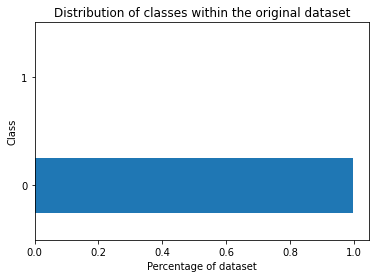

In [119]:
#original dataset
breakdown = pd.Series(df.Class.value_counts(normalize = True))
#plot
ax = breakdown.plot.barh()
ax.set(title="Distribution of classes within the original dataset", xlabel = "Percentage of dataset", ylabel = "Class")
plt.show();

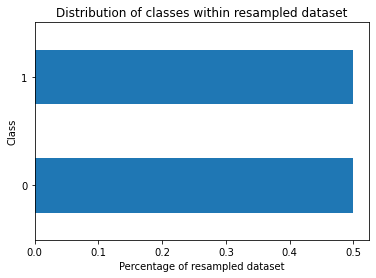

In [120]:
# resampled dataset
resample = pd.Series(y_re.value_counts(normalize = True))
#plot
ax = resample.plot.barh()
ax.set(title = "Distribution of classes within resampled dataset", xlabel = "Percentage of resampled dataset", ylabel = "Class")
plt.show();

We can see from the above barplots that the resampled data is evenly split between positive and negative class, while over 99% of the original data set is negative class.

In [104]:
#create train test split for resampled dataset
Xre_train, Xre_test, yre_train, yre_test = train_test_split(X_re, y_re)
print(Xre_train.shape, Xre_test.shape)
print(yre_train.shape, yre_test.shape)

(426459, 30) (142154, 30)
(426459,) (142154,)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71248
           1       1.00      1.00      1.00     70906

    accuracy                           1.00    142154
   macro avg       1.00      1.00      1.00    142154
weighted avg       1.00      1.00      1.00    142154



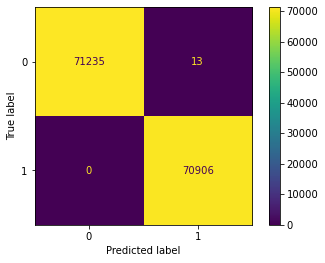

PR AUC socre is 0.9998166922827451


In [125]:
#fit the extra trees model (the higher scoring model) on the newly resampled dataset
# instantiate model
extra_re = ExtraTreesClassifier()
#fit model
extra_re.fit(Xre_train, yre_train)
#create predictions
predictions = extra_re.predict(Xre_test)
#print classification report and confusion matrix
print(classification_report(yre_test, predictions))
disp = ConfusionMatrixDisplay.from_estimator(extra_re, Xre_test,yre_test)
plt.show();
# and PR AUC score...
print(f"PR AUC socre is {average_precision_score(yre_test, predictions)}")

How well does it perform on the original dataset?

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.98      1.00      0.99        98

    accuracy                           1.00     56962
   macro avg       0.99      1.00      0.99     56962
weighted avg       1.00      1.00      1.00     56962



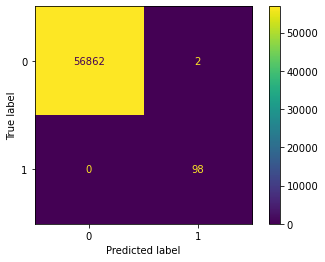

PR AUC score is 0.98


In [126]:
#use the model predict on original test data
predictions2 = extra_re.predict(X_test)
#print classification report and confusion matrix
print(classification_report(y_test, predictions2))
disp = ConfusionMatrixDisplay.from_estimator(extra_re, X_test,y_test)
plt.show();
#and PR AUC score..
print(f"PR AUC score is {average_precision_score(y_test, predictions2)}")

# Evaluation

While tuning the parameters with gridsearch did improve the performance of the ExtraTrees model, it was far more effective once the data had been resampled using ADASYN to correct the imbalance.  This suggests that the biggest challenge for the models was 'learning' from such a small sample of positive cases.

Once this was addressed, the overall performance of the model was drastically improved, moving the PR AUC score from 0.79 to 0.98.

When looking at the confusion matrix we can see that the model can now correctly all 98 of the fraudulent transactions in the test data (compared to ___ in the original data), resulting in a recall score of 1.  Furthermore, it's precision is 0.98 as it only has 2 false positives.  This means that if the model predicts a transaction as fraudulent, we have a 98% certainty that it is fraud and not a genuine transaction, reducing the number of genuine transcations that are blocked by the model